In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as m
%matplotlib inline 
import pylab

In [5]:
f = np.genfromtxt('playground_sum.txt', usecols=(0,1))

freq = f[:,1]
temp = f[:,0]

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

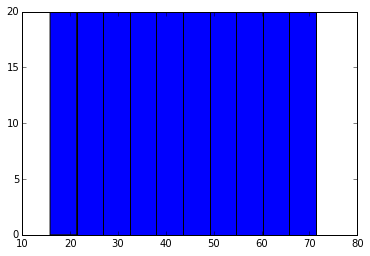

In [11]:
plt.hist(temp)
plt.colorbar()

AttributeError: 'Rectangle' object has no attribute 'set_clim'

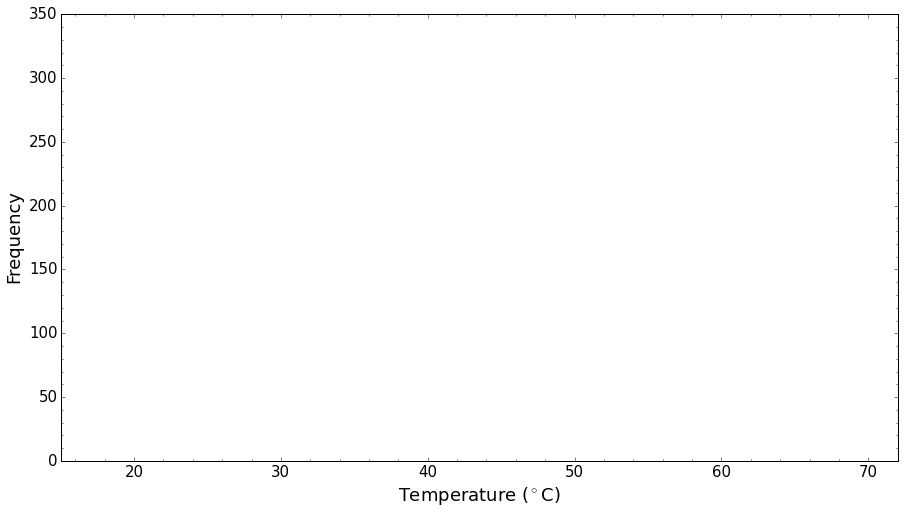

In [6]:
fig = plt.gcf()
plt.figure(figsize=[15,8])
#plt.title('Power Ranch Temperature Frequency',fontsize=20)
plt.xlabel('Temperature ($^\circ$C)',fontsize=18)
plt.xlim([15,72])
plt.xticks(fontsize=15)
plt.ylabel('Frequency',fontsize=18)
plt.yticks(fontsize=15)
plt.minorticks_on()

def rect(x,y,w,h,c):
    ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    polygon.set_clim(0,100)
    ax.add_patch(polygon)

    
cdict = {

  'blue' :  ( (0, 1, 1), 
             #(0, 0, 0), 
             #(0.5, 0.25, 0.25), 
             #(0.75, 0.1, 0.1),
             (1, 0.2, 0.2)),

  'green':  ( (0, 1, 1), 
             #(0.25, 0, 0), 
             #(0.5, 0, 0), 
             #(0.75, 0, 0), 
             (1, 0.5, 0.5)),

  'red'  :  ( (0, 1, 1), 
             #(0.25, 0.25, 0.25), 
             (0.5, 0.5, 0.5), 
             (0.75, 0.9, 0.9), 
             (1, 1, 1))
}

cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 2000)
    
    
def rainbow_fill(X,Y, cmap=cm):
    plt.plot(X,Y,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    N  = float(X.size)

    for n, (x,y) in enumerate(zip(X,Y)):
        color = cmap(n/N)
        rect(x,0,dx,y,color)
        
# Test data    
X = temp
Y = freq
rainbow_fill(X,Y)
plt.show()

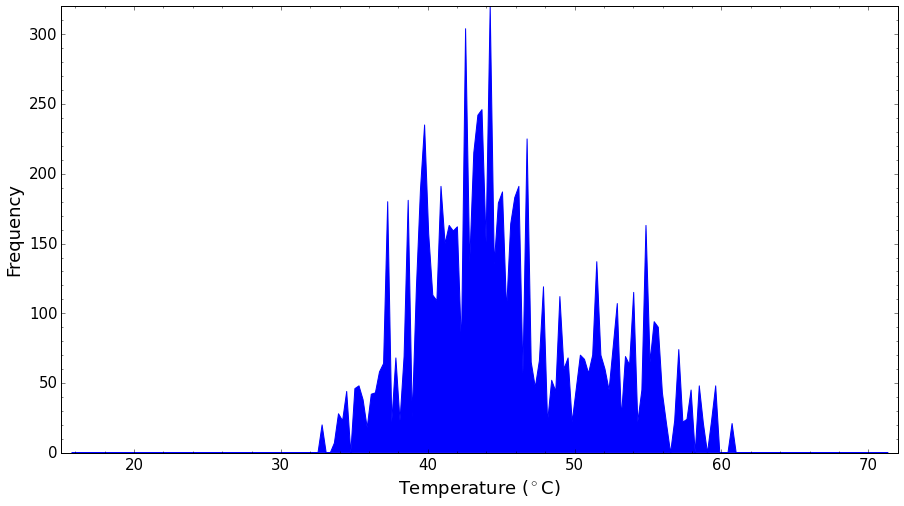

In [4]:
fig = plt.gcf()
plt.figure(figsize=[15,8])
#plt.title('Power Ranch Temperature Frequency',fontsize=20)
plt.xlabel('Temperature ($^\circ$C)',fontsize=18)
plt.xlim([15,72])
plt.ylim([np.min(freq),np.max(freq)])
plt.xticks(fontsize=15)
plt.ylabel('Frequency',fontsize=18)
plt.yticks(fontsize=15)
plt.minorticks_on()

# calculate polynomial
z = np.polyfit(temp, freq, 10)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(np.min(temp), np.max(temp), 500)
y_new = f(x_new)

#np.polyfit(temp,freq)
#plt.plot(temp,freq,'o',x_new,y_new)

plt.fill_between(temp,freq,color='blue')
plt.show()


In [3]:
plt.h

NameError: name 'jet' is not defined